In [6]:
base_dir = "/home/wwf/Project/script-rl/REDQ-DroQ/output/"

In [7]:
task = "hopper"
path_sac = base_dir + "sac-seed=0-hopper-07-31-24_19_39_29/"
path_redq = base_dir + "0-hopper-redq-seed=0-240802_165910/"

task = "humanoid"
path_sac = base_dir + "sac-seed=0-humanoid-07-31-24_23_42_56/"
path_redq = base_dir + "redq-seed=0-humanoid-07-31-24_23_43_32/"

task = "walker"
path_sac = base_dir + "sac-seed=0-walker-07-31-24_20_48_41/"
path_redq = base_dir + "redq-seed=0-walker-07-31-24_20_49_05/"

In [8]:

task = "ant"
path_sac = base_dir + "sac-seed=0-ant-07-31-24_23_42_32/"
# path_redq = base_dir + "redq-seed=0-ant-07-31-24_23_42_40/"
path_redq = base_dir + "2-ant-redq-seed=0-240802_165929/"

In [9]:
import sys, os, pathlib
DirPathCurrent = os.path.abspath('') + "/"
DirPathParent = pathlib.Path(DirPathCurrent).parent.absolute().__str__() + "/"
DirPathGrandParent = pathlib.Path(DirPathParent).parent.absolute().__str__() + "/"
DirPathGreatGrandParent = pathlib.Path(DirPathGrandParent).parent.absolute().__str__() + "/"
sys.path += [
    DirPathCurrent, DirPathParent, DirPathGrandParent
]
from utils_project import ListAllFilePaths, DirPathProject

In [10]:
path_tensorboard_sac = ListAllFilePaths(os.path.join(path_sac, "tensorboard"))[0]
path_tensorboard_redq = ListAllFilePaths(os.path.join(path_redq, "tensorboard"))[0]

In [11]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
ea_sac = EventAccumulator(path_tensorboard_sac)
ea_sac.Reload()

ea_redq = EventAccumulator(path_tensorboard_redq)
ea_redq.Reload()

2024-08-02 19:00:15.071300: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-02 19:00:15.135594: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-02 19:00:15.904827: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


ea.Tags() is a dict that looks like:
```
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['ep_r'], 'distributions': [], 'tensors': []}
```
This means there is a log item called 'ep_r', and its data type is 'scalars'.

In [12]:
def get_step_value_list(ea):
    ep_r_events = ea.Scalars('ep_r')
    steps = [event.step for event in ep_r_events]
    values = [event.value for event in ep_r_events]

    return steps, values

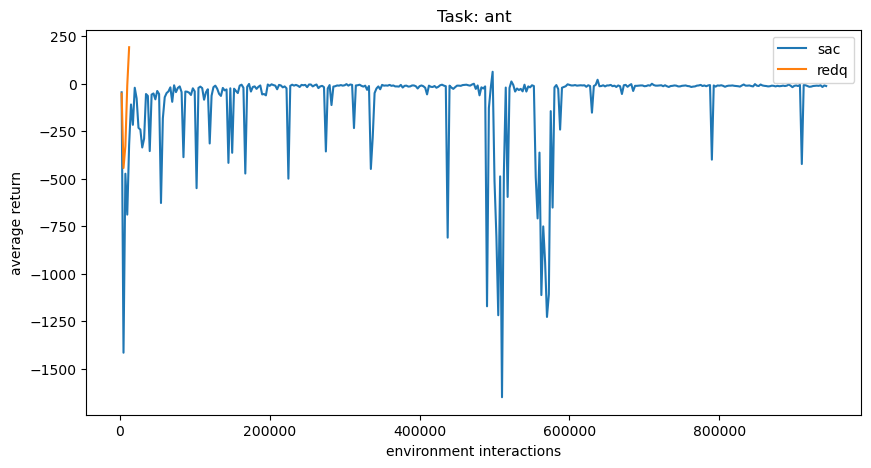

In [13]:
import matplotlib.pyplot as plt

steps_sac, values_sac = get_step_value_list(ea_sac)
steps_redq, values_redq = get_step_value_list(ea_redq)

# plot the data
plt.figure(figsize=(10, 5))
plt.plot(steps_sac, values_sac, label="sac")
plt.plot(steps_redq, values_redq, label="redq")
plt.legend()
plt.xlabel('environment interactions')
plt.ylabel('average return')
plt.title('Task: %s'%task)
plt.legend()
plt.savefig(DirPathProject + "result/train-cmp-%s.png"%task)
plt.show()